# Melbourne Housing Market Prediction

## Import Packages and Libraries

In [2]:
# Import libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd                                               
from pandas.plotting import scatter_matrix
import seaborn as sns                                             
import matplotlib.pyplot as plt                                   
%matplotlib inline
import numpy as np                                                

from dateutil.parser import parse                               
from datetime import datetime                                     
from scipy.stats import norm                                      

import sklearn
from sklearn.model_selection import cross_val_predict             
from sklearn.model_selection import cross_val_score               
from sklearn.model_selection import cross_validate                
from sklearn.model_selection import train_test_split              
from sklearn.ensemble import RandomForestRegressor                
from sklearn.model_selection import RandomizedSearchCV            
from sklearn.preprocessing import RobustScaler                    
from sklearn import preprocessing

## Data Collection

In [3]:
# load data 
housing= pd.read_csv('data/MELBOURNE_HOUSE_PRICES_FULL.csv')

In [4]:
# show data
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


## Data Pre-processing

In [6]:
# check data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

### Handling Missing Values

In [7]:
# check missing values
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
# Try using mean
priceWithMean = housing['Price'].fillna(housing['Price'].mean())
BAWithMean = housing['BuildingArea'].fillna(housing['BuildingArea'].mean())

# Try using median median
priceMedian = housing['Price'].fillna(housing['Price'].median())
BAMedian = housing['BuildingArea'].fillna(housing['BuildingArea'].median())

In [9]:
missVIDsJoint = housing['Price'].isnull() | housing['BuildingArea'].isnull()
# missVIDsJoint now has a True for items that are missing an Age or a Fare value

In [10]:
# color dict
colorChoiceDict = {True: (1.0, 0.55, 0.0, 1.0), False: (0.11, 0.65, 0.72, 0.1)}

# color for columns
colorCol = [colorChoiceDict[val] for val in missVIDsJoint]

Text(0, 0.5, 'Price')

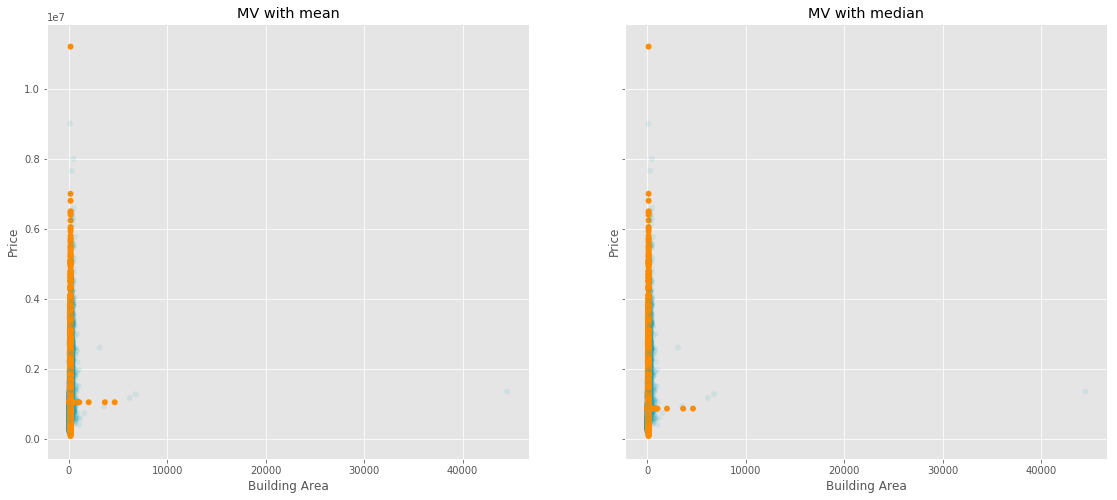

In [11]:
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(19, 8))
ax1.scatter(BAWithMean, priceWithMean, c = colorCol, linewidth=0)
ax1.set_title('MV with mean')
ax1.set_xlabel('Building Area')
ax1.set_ylabel('Price')
ax2.scatter(BAMedian, priceMedian, c = colorCol, linewidth=0)
ax2.set_title('MV with median')
ax2.set_xlabel('Building Area')
ax2.set_ylabel('Price')

In [12]:
# numerical data
housing['Price']= housing['Price'].fillna(housing['Price'].median())
housing['Landsize']= housing['Landsize'].fillna(housing['Landsize'].median())
housing['Distance'] = housing['Distance'].fillna(housing['Distance'].median())
housing['BuildingArea']= housing['BuildingArea'].fillna(housing['BuildingArea'].median())
housing['Lattitude']= housing['Lattitude'].fillna(housing['Lattitude'].median())
housing['Longtitude']= housing['Longtitude'].fillna(housing['Longtitude'].median())
housing['YearBuilt']= housing['YearBuilt'].fillna(housing['YearBuilt'].median())
housing.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            1
Bedroom2         8217
Bathroom         8226
Car              8728
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       3
dtype: int64

In [13]:
# categorical data
housing['Bathroom']= housing['Bathroom'].fillna(housing['Bathroom'].mode()[0])
housing['Car']= housing['Car'].fillna(housing['Car'].mode()[0])
housing['CouncilArea']= housing['CouncilArea'].fillna(housing['CouncilArea'].mode()[0])
housing['Regionname']= housing['Regionname'].fillna(housing['Regionname'].mode()[0])
housing['Propertycount']= housing['Propertycount'].fillna(housing['Propertycount'].mode()[0])
housing['Postcode']= housing['Postcode'].fillna(housing['Postcode'].mode()[0])
housing.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2         8217
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### Data Type Conversion

In [14]:
# convert data type
housing['Postcode']= housing['Postcode'].astype('object')
housing['Bathroom'] = pd.to_numeric(housing['Bathroom']).round(0).astype(int)
housing['Car'] = pd.to_numeric(housing['Car']).round(0).astype(int)

### Remove Duplicate Variables

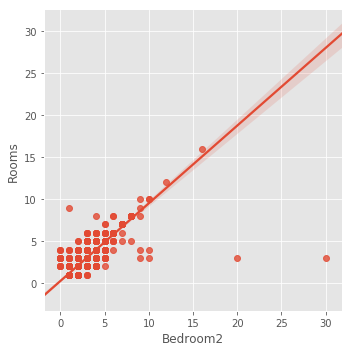

In [15]:
# Bedroom2 vs Rooms
sns.lmplot(data= housing, x='Bedroom2', y='Rooms')

In [16]:
# Drop Bedroom2
housing = housing.drop(['Bedroom2'], axis=1)

### Remove Outlier

In [17]:
# describe data
housing.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,3.485700e+04,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.00000,34857.000000,34857.000000
mean,3.031012,1.010838e+06,11.184904,1.477350,1.796741,569.001520,145.562827,1967.898643,-37.80994,145.003212,7574.099865
std,0.969933,5.719992e+05,6.788797,0.686361,0.882969,2763.907731,252.222644,25.042048,0.07929,0.105558,4429.825107
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.19043,144.423790,83.000000
25%,2.000000,6.950000e+05,6.400000,1.000000,1.000000,357.000000,136.000000,1970.000000,-37.84690,144.964400,4385.000000
50%,3.000000,8.700000e+05,10.300000,1.000000,2.000000,521.000000,136.000000,1970.000000,-37.80760,145.007800,6763.000000
75%,4.000000,1.150000e+06,14.000000,2.000000,2.000000,598.000000,136.000000,1970.000000,-37.77090,145.051750,10412.000000
max,16.000000,1.120000e+07,48.100000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.39020,145.526350,21650.000000


In [18]:
# count bathroom values
housing['Bathroom'].value_counts()

1     21195
2     11064
3      2181
4       269
5        77
0        46
6        16
7         4
8         3
12        1
9         1
Name: Bathroom, dtype: int64

In [19]:
housing.loc[housing.Bathroom>7].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2536,Burwood,36 Cumming St,3,h,870000.0,PI,Ross,8/10/2016,11.7,3125,12,0,946.0,136.0,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072,8,7,1254.0,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0
17472,Camberwell,1088 Toorak Rd,8,h,2200000.0,PI,Ross,8/07/2017,7.7,3124,8,4,650.0,136.0,1970.0,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920.0
25717,Burwood,79 Elgar Rd,10,h,2315000.0,SP,Buxton,28/10/2017,10.4,3125,9,2,612.0,466.0,2015.0,Monash City Council,-37.84461,145.10968,Southern Metropolitan,5678.0
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132,8,8,521.0,136.0,1970.0,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0


In [20]:
# check BuildingArea
housing.loc[housing.BuildingArea<1].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,4/03/2017,2.3,3051,1,1,215.0,0.00,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0
16540,South Melbourne,148 Cobden St,3,h,870000.0,S,Marshall,24/06/2017,1.9,3205,2,0,282.0,0.01,1920.0,Port Phillip City Council,-37.83658,144.96292,Southern Metropolitan,5943.0
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,3/09/2017,9.7,3104,3,2,743.0,0.00,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,3/09/2017,12.1,3083,1,2,542.0,0.00,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0
20038,Heidelberg Heights,8 Thames St,3,h,870000.0,SN,Miles,3/09/2017,8.8,3081,1,2,658.0,0.00,1920.0,Banyule City Council,-37.75287,145.05547,Eastern Metropolitan,2947.0


In [21]:
housing['BuildingArea'].loc[housing.BuildingArea<1].count()

77

In [22]:
# Drop BuildingArea < 1
housing = housing[~(housing['BuildingArea'] < 1)]  

# re-check
housing['BuildingArea'].loc[housing.BuildingArea<1].count()

0

In [23]:
# Reset index
housing = housing.reset_index()

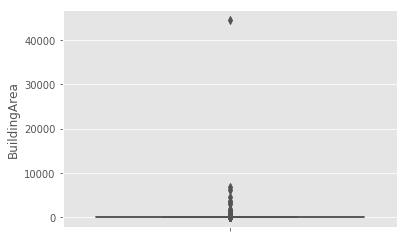

In [24]:
sns.boxplot(data = housing, y = 'BuildingArea')

In [25]:
housing.loc[housing.BuildingArea>40000]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
22614,22632,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,...,3,5,44500.0,44515.0,1970.0,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849.0


In [26]:
# Replace outlier
housing['BuildingArea'].replace(44515.0, 445, inplace=True)

In [27]:
# check YearBuilt > 2018
print(housing['YearBuilt'].loc[housing.YearBuilt>2020])
# Replace year
housing['YearBuilt'].replace([2106, 2019], [2016, 2018], inplace=True)

2453    2106.0
Name: YearBuilt, dtype: float64


In [28]:
# create additional columns filled with 0 values
housing["isOutlierPrice"] = 0 
housing["isOutlierDistance"] = 0

# save the mean and standard deviation in variables
meanPrice = housing['Price'].mean()
stdDevPrice = housing['Price'].std()

meanDistance = housing['Distance'].mean()
stdDevDistance = housing['Distance'].std()

# mark outliers as 
housing['isOutlierPrice'] = np.where(abs(housing['Price'] - meanPrice) > 5 * stdDevPrice, 1, 0)
housing['isOutlierDistance'] = np.where(abs(housing['Distance'] - meanDistance) > 5 * stdDevDistance, 1, 0)

In [29]:
# create a function to compute the percentage of missing values
def percent(nom, denom):
    res= (nom*100)/denom
    print("%.3f%%" % round(res,3))

# percentage of MV for Price
percent(housing["isOutlierPrice"].value_counts()[1], housing["isOutlierPrice"].value_counts()[0])   

0.465%


In [30]:
# percentage of MV for Landsize
percent(housing["isOutlierDistance"].value_counts()[1], housing["isOutlierDistance"].value_counts()[0])   

0.196%


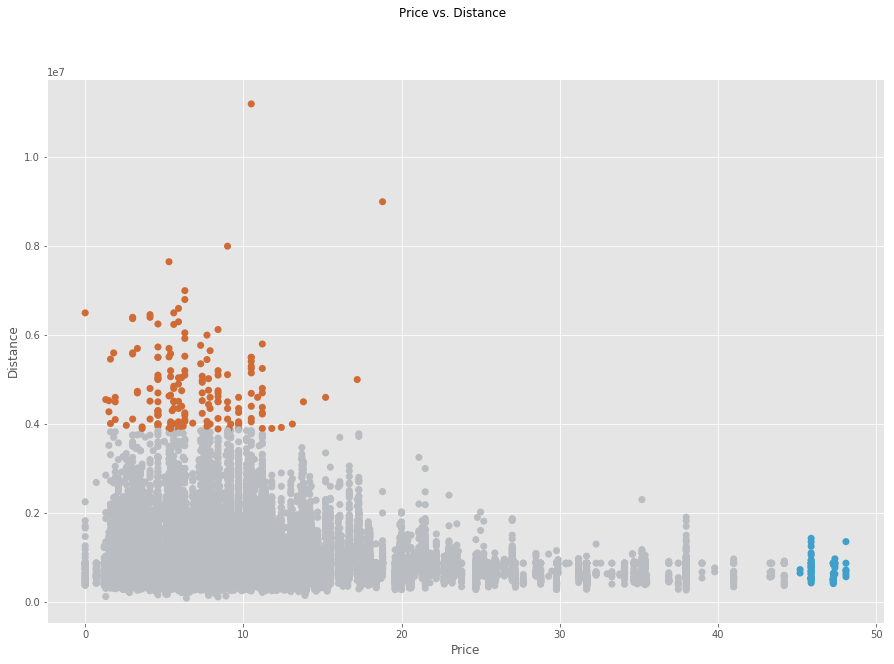

In [31]:
# This part helps us to generate a color array with different colors for the 1D outliers we compute

# first create an empty list
colorColumn = []
# we make use of the HEX color codes to use nicely distinguisable colors
for i in range(len(housing)):
    if housing["isOutlierPrice"][i]== 1:
        colorColumn.append("#D06B36") # orange color
    elif housing["isOutlierDistance"][i] == 1:
        colorColumn.append("#40A0C9") # a blueish color
    else:
        colorColumn.append("#B9BCC0") # gray

plt.figure(figsize=(15,10))
plt.xlabel('Price')
plt.suptitle('Price vs. Distance')
plt.ylabel('Distance')
plt.scatter(housing.Distance, housing.Price , c = colorColumn, s = 50, linewidth=0)

In [32]:
# check outlier
housing.iloc[:,:19][housing.Price > 11000000]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
25585,25635,Brighton,6 Cole St,4,h,11200000.0,VB,hockingstuart,28/10/2017,10.5,3186,3,2,1400.0,136.0,1970.0,Bayside City Council,-37.89335,144.98643


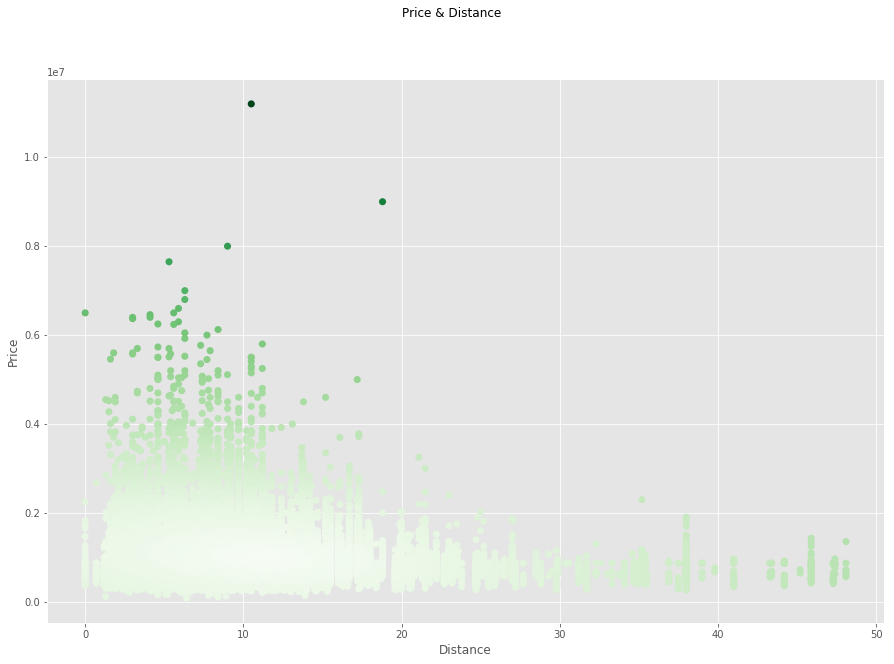

In [33]:
# We now get a part of the data frame as a numpy matrix to use in scipy
housing.dropna()
columnValues = housing[["Price", "Distance"]].values


# In order to generate a "mean vector", we use the mean values already computed above.
# Notice that we make use of the reshape() function to get the mean vector in a compatible shape
# as the data values.
meanVector = np.asarray([meanPrice, meanDistance]).reshape(1,2)

# We make us of the scipy function which does the computations itself.
# Alternatively, one can provide a covariance matrix that is computed outside as a parameter.
# In cases where robustness of the covariance matrix is the issue, this can be a good option.

# first import the spatial subpackage from scipy
from scipy import spatial
mahalanobisDistances = spatial.distance.cdist(columnValues, meanVector, 'mahalanobis')[:,0]

# We create a new figure where we use a color mapping and use the computed mahalanobis distances 
# as the mapping value
plt.figure(figsize=(15,10))
plt.xlabel('Distance')
plt.suptitle('Price & Distance')
plt.ylabel('Price')
plt.scatter(housing.Distance, housing.Price , c = mahalanobisDistances, cmap = plt.cm.Greens, s = 50, linewidth=0)

### Feature Engineering

In [34]:
housing['houseAge'] = 2018-housing['YearBuilt']

In [35]:
# create the new column data restructuring the original Date column with pd.to_datetime
housing['data'] = pd.to_datetime(housing['Date'])

In [36]:
# count day of year
housing['doy'] = housing['data'].dt.dayofyear
# Create year
housing['Year'] = housing['data'].dt.year

# split day
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

daje = []
for i in housing['doy']:
    if i in spring:
        season = 'spring'
    elif i in summer:
        season = 'summer'
    elif i in fall:
        season = 'fall'
    else:
        season = 'winter'
    daje.append(season)   

# add season to dataframe
housing['season']= pd.Series(daje)

In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34780 entries, 0 to 34779
Data columns (total 28 columns):
index                34780 non-null int64
Suburb               34780 non-null object
Address              34780 non-null object
Rooms                34780 non-null int64
Type                 34780 non-null object
Price                34780 non-null float64
Method               34780 non-null object
SellerG              34780 non-null object
Date                 34780 non-null object
Distance             34780 non-null float64
Postcode             34780 non-null object
Bathroom             34780 non-null int32
Car                  34780 non-null int32
Landsize             34780 non-null float64
BuildingArea         34780 non-null float64
YearBuilt            34780 non-null float64
CouncilArea          34780 non-null object
Lattitude            34780 non-null float64
Longtitude           34780 non-null float64
Regionname           34780 non-null object
Propertycount        34780 n

### Data Exploration

In [38]:
# split data
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing = train_set.copy()

#### Distribution and Correlation

##### Boxplots and histograms

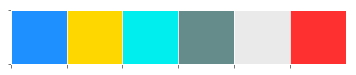

In [39]:
# color palette
myPal = ["#1E90FF", "#FFD700", "#00EEEE", "#668B8B", "#EAEAEA", "#FF3030"]
sns.set_palette(myPal)
sns.palplot(sns.color_palette())

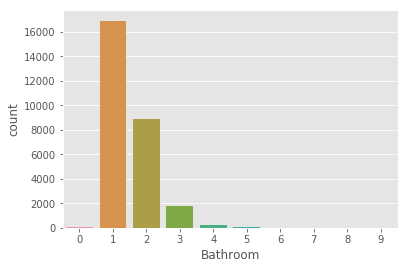

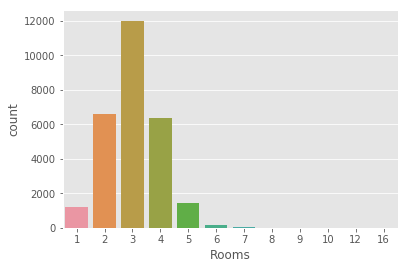

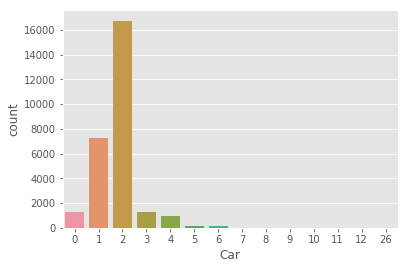

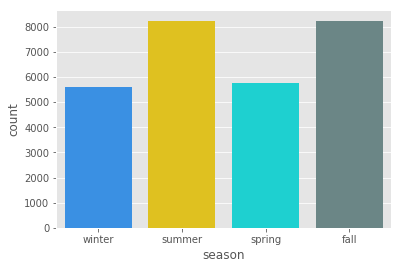

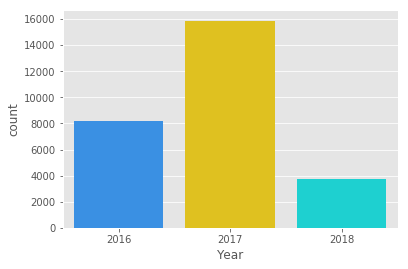

In [40]:
l= ['Bathroom', 'Rooms', 'Car', 'season', 'Year']

for i in l:
    plt.figure()
    sns.countplot(x=i, data=housing)

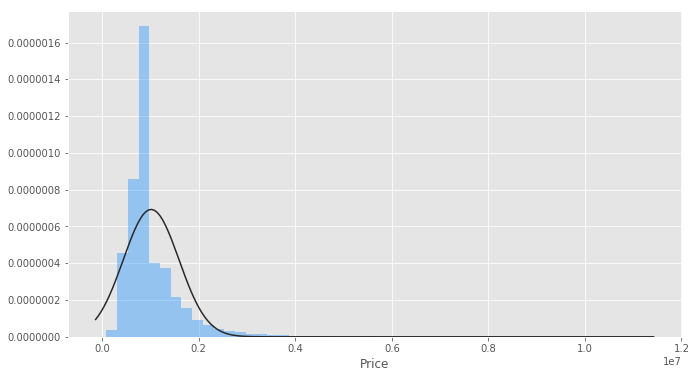

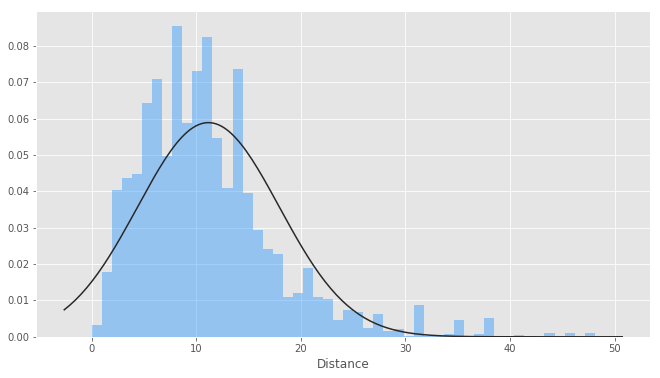

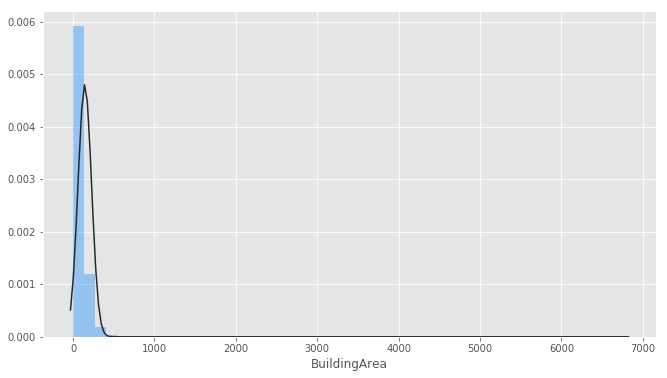

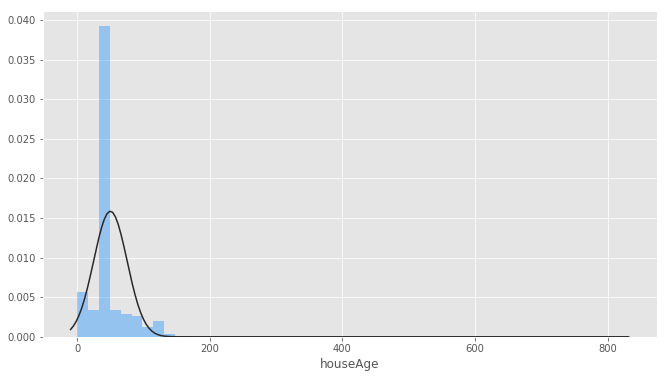

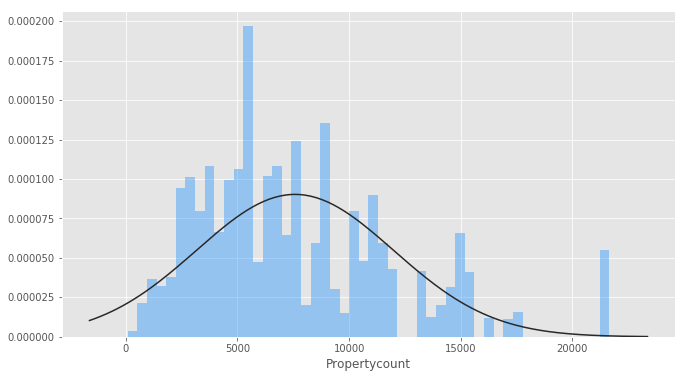

In [41]:
l= [housing['Price'], housing['Distance'], housing['BuildingArea'], housing['houseAge'], housing['Propertycount']]
for i in l:
    plt.figure(figsize=(11,6))
    sns.distplot(i, fit=norm, kde=False)

(0, 1000)

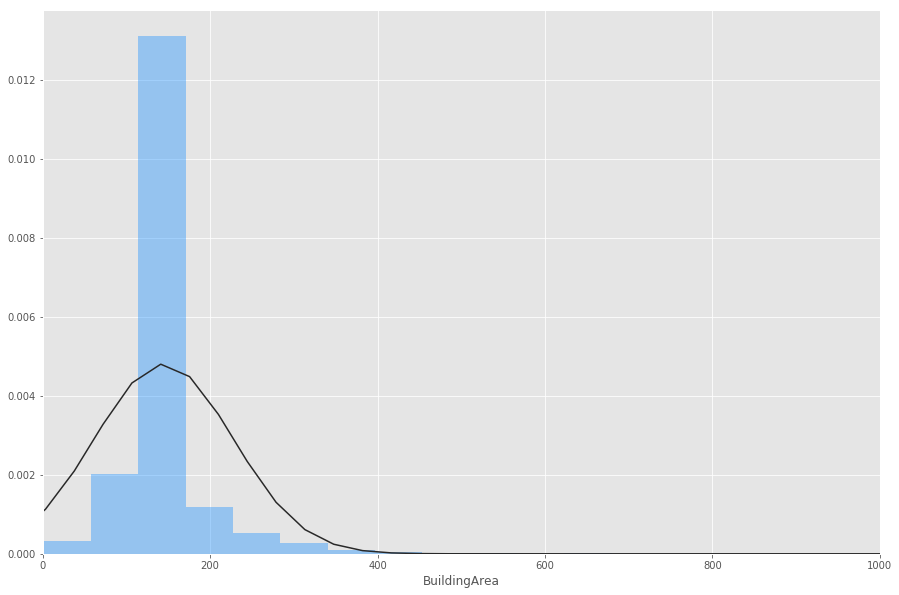

In [42]:
plt.figure(figsize=(15,10))
sns.distplot(housing['BuildingArea'], fit=norm, bins=120, kde=False)
plt.xlim(0,1000)

Text(0.5, 1.0, 'Rooms & Price')

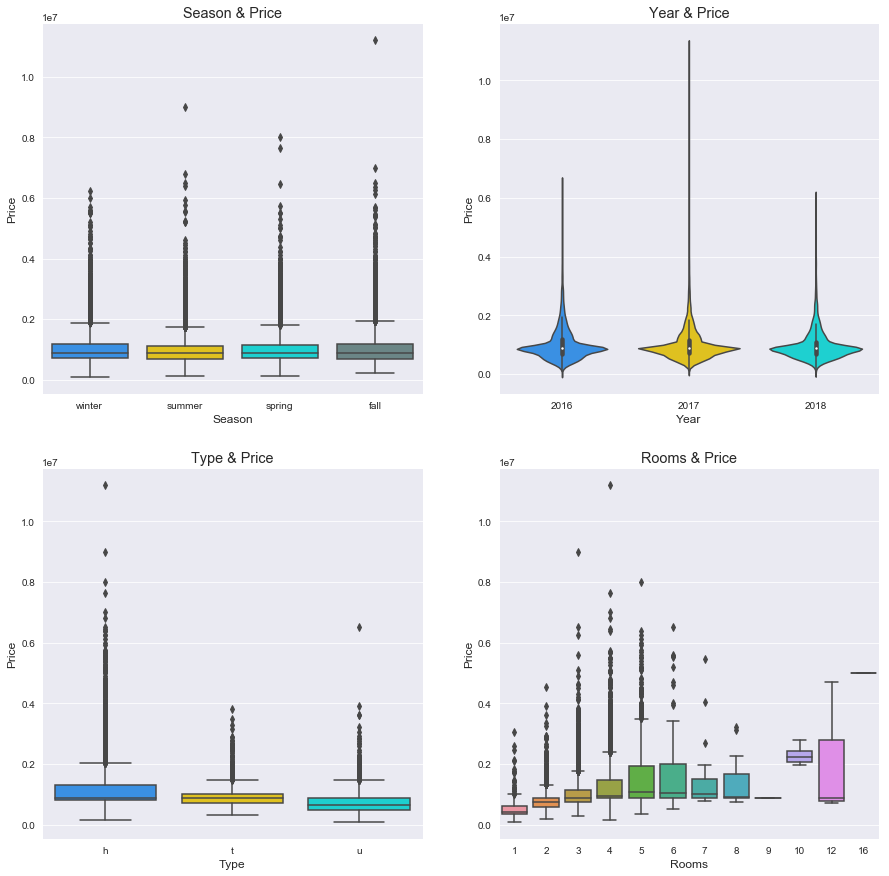

In [43]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = housing, x = 'season', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Season')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Season & Price')

# Plot [0,1]
sns.violinplot(data = housing, x = 'Year', y = 'Price', ax = axes[0, 1])
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Year & Price')

# Plot [1,0]
sns.boxplot(x = 'Type', y = 'Price', data = housing, ax = axes[1,0])
axes[1,0].set_xlabel('Type')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Type & Price')

# Plot [1,1]
sns.boxplot(x = 'Rooms', y = 'Price', data = housing, ax = axes[1,1])
axes[1,1].set_xlabel('Rooms')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Rooms & Price')

#### Time Series

In [44]:
#use shape to count the number of rows of the database grouped by day using a pivot table.
housing.pivot_table('Price', index='data', aggfunc='sum').shape

(78, 1)

([<matplotlib.axis.XTick at 0x14a7e643108>,
 <a list of 13 Text xticklabel objects>)

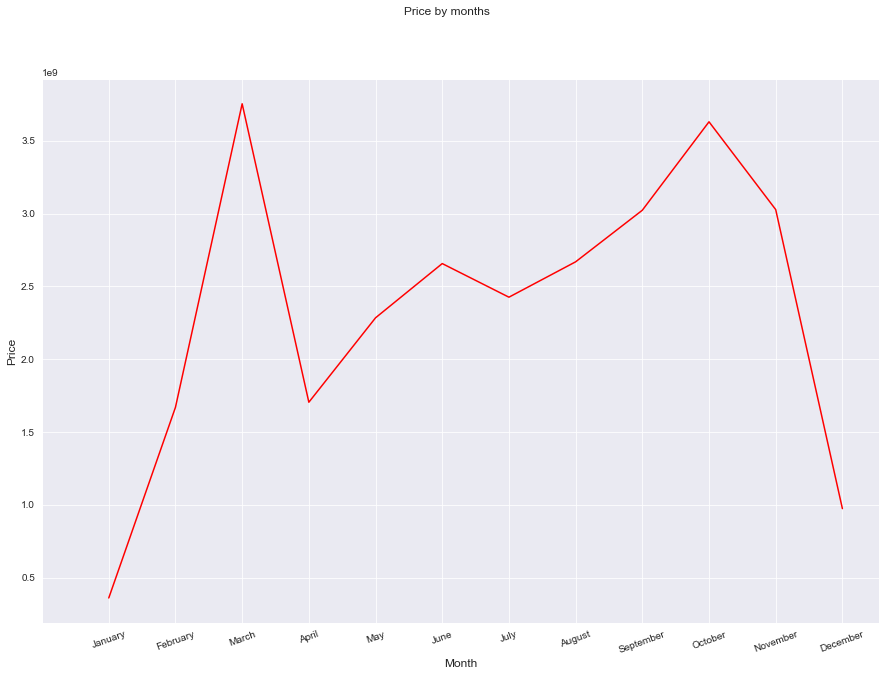

In [45]:
import calendar
# create new column storing the month of each operation
housing['month'] = housing['data'].dt.month
# use group by (alternative to pivot_table) to have the total value of houses sold per month
by_month= housing.groupby('month')['Price'].sum()
# plot figure
plt.figure(figsize=(15,10))
plt.plot(by_month, color="red")
plt.xlabel('Month')
plt.suptitle('Price by months')
plt.ylabel('Price')
plt.xticks(np.arange(13), calendar.month_name[0:13], rotation=20)

[Text(0, 0, '2016-01'),
 Text(0, 0, '2016-03'),
 Text(0, 0, '2016-04'),
 Text(0, 0, '2016-05'),
 Text(0, 0, '2016-06'),
 Text(0, 0, '2016-07'),
 Text(0, 0, '2016-08'),
 Text(0, 0, '2016-09'),
 Text(0, 0, '2016-10'),
 Text(0, 0, '2016-11'),
 Text(0, 0, '2016-12'),
 Text(0, 0, '2017-01'),
 Text(0, 0, '2017-02'),
 Text(0, 0, '2017-03'),
 Text(0, 0, '2017-04'),
 Text(0, 0, '2017-05'),
 Text(0, 0, '2017-06'),
 Text(0, 0, '2017-07'),
 Text(0, 0, '2017-08'),
 Text(0, 0, '2017-09'),
 Text(0, 0, '2017-10'),
 Text(0, 0, '2017-11'),
 Text(0, 0, '2017-12'),
 Text(0, 0, '2018-01'),
 Text(0, 0, '2018-02'),
 Text(0, 0, '2018-03'),
 Text(0, 0, '2018-06'),
 Text(0, 0, '2018-10')]

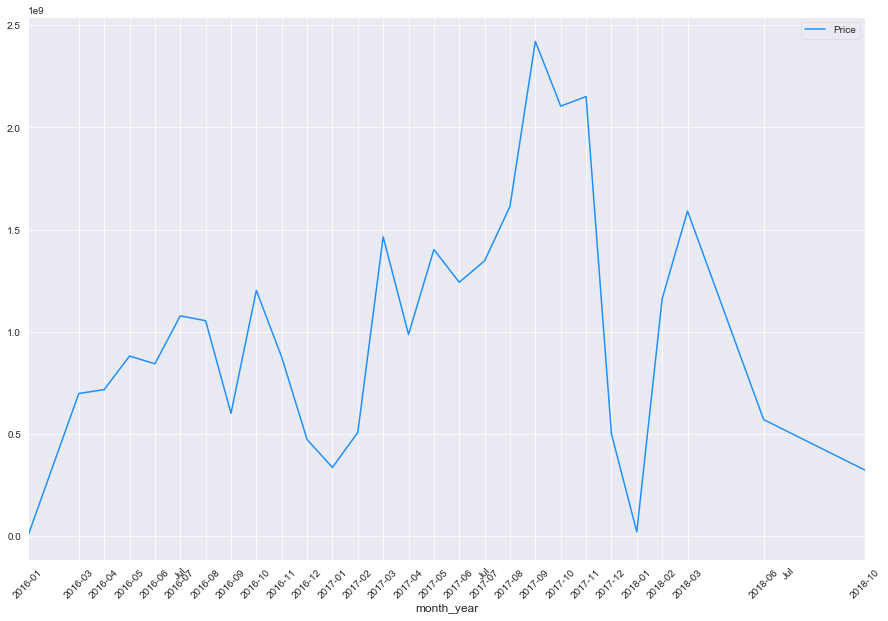

In [46]:
# index month-year
housing['month_year'] = housing['data'].dt.to_period('M')
# use groupby to compute the price for each available month, then store the result in a dataframe
by_year_month= pd.Series.to_frame(housing.groupby('month_year')['Price'].sum())
# graph
fig, ax = plt.subplots(figsize=(15,10))
by_year_month.plot(ax=ax, xticks=by_year_month.index, rot=45)
ax.set_xticklabels(by_year_month.index)

#### Correlation Analysis

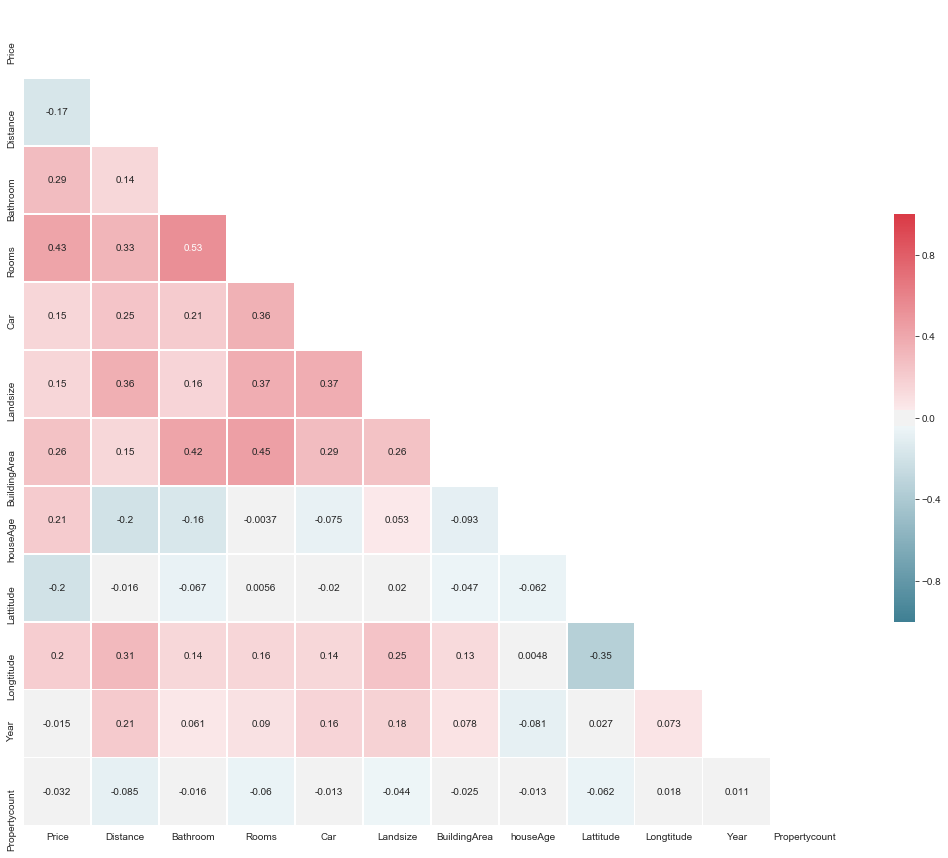

In [47]:
# choose columns
attributes= ['Price', 'Distance', 'Bathroom', 'Rooms', 'Car', 'Landsize', 'BuildingArea', 'houseAge', 'Lattitude', 'Longtitude', 
             'Year', 'Propertycount']
h= housing[attributes]

# Whitegrid
sns.set_style('whitegrid')
# correlation matrix...
corr_matrix=h.corr(method='spearman')
#...and show it with a heatmap
# dimension
plt.figure(figsize=(20,15))

# generate mask for upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# generate custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# heatmap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


* BuildingArea (r= .26)
* HouseAge (.21)
* Rooms - This is the strongest relationship (.43).
* Distance - most negative correlation (-.17)

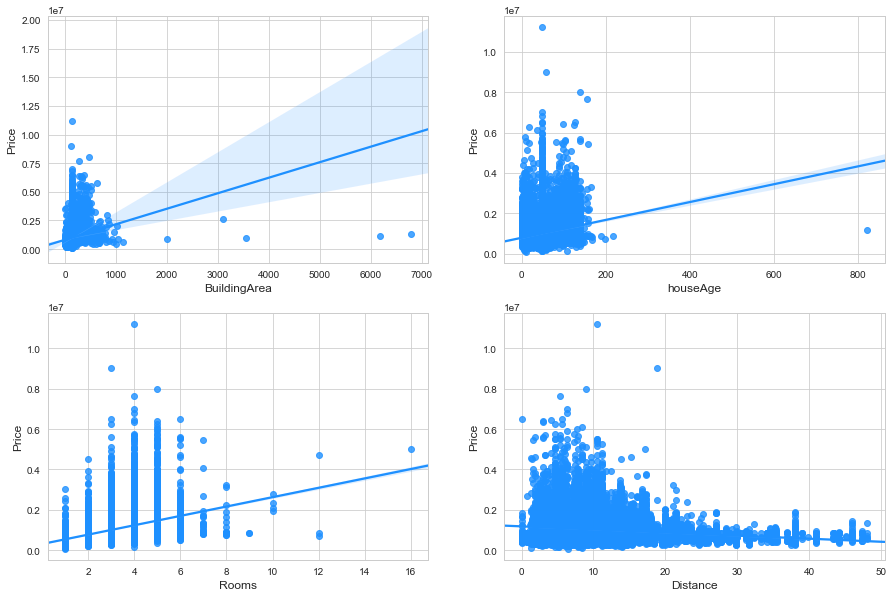

In [48]:
# Scatterplot
f, axes = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.regplot(data= housing, x='BuildingArea', y='Price')
plt.subplot(222)
sns.regplot(data= housing, x='houseAge', y='Price')
plt.subplot(223)
sns.regplot(data= housing, x='Rooms', y='Price')
plt.subplot(224)
sns.regplot(data= housing, x='Distance', y='Price')

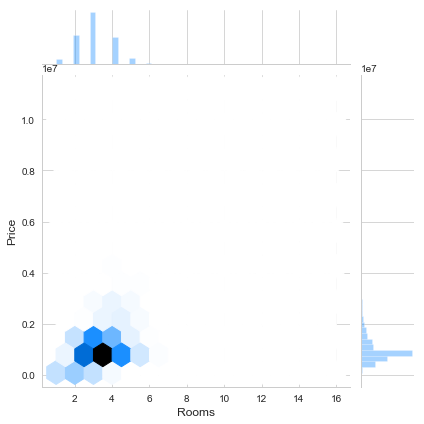

In [49]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Price and distance
    sns.jointplot(y='Price', x='Rooms', data=housing, kind='hex', gridsize=15)

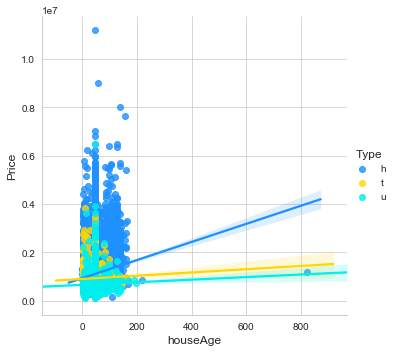

In [50]:
sns.lmplot(data= housing, x='houseAge', y= 'Price', hue= 'Type')

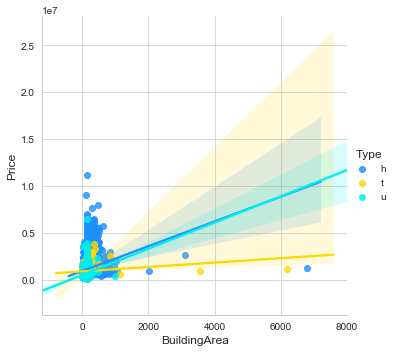

In [51]:
sns.lmplot(data= housing, x='BuildingArea', y= 'Price', hue='Type')

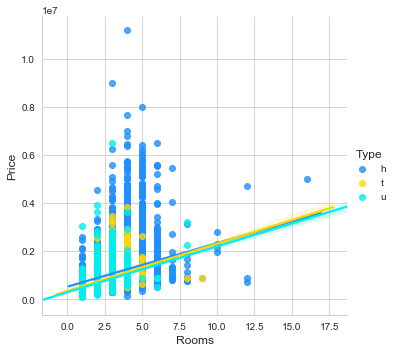

In [52]:
sns.lmplot(data= housing, x='Rooms', y= 'Price', hue='Type')

### One-hot Encoding

In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27824 entries, 34585 to 15795
Data columns (total 30 columns):
index                27824 non-null int64
Suburb               27824 non-null object
Address              27824 non-null object
Rooms                27824 non-null int64
Type                 27824 non-null object
Price                27824 non-null float64
Method               27824 non-null object
SellerG              27824 non-null object
Date                 27824 non-null object
Distance             27824 non-null float64
Postcode             27824 non-null object
Bathroom             27824 non-null int32
Car                  27824 non-null int32
Landsize             27824 non-null float64
BuildingArea         27824 non-null float64
YearBuilt            27824 non-null float64
CouncilArea          27824 non-null object
Lattitude            27824 non-null float64
Longtitude           27824 non-null float64
Regionname           27824 non-null object
Propertycount        278

In [54]:
# dummy variable
housing['Price_cut']= housing['Price'].loc[housing.Price<3500000]
hD= pd.get_dummies(housing, columns= ['Type', 'Regionname', 'season'])
# drop useless variables
hD= hD.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'isOutlierPrice', 'isOutlierDistance',
            'YearBuilt', 'data', 'doy', 'month', 'month_year', 'Price_cut'], axis=1)
# check variables
hD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27824 entries, 34585 to 15795
Data columns (total 28 columns):
index                                    27824 non-null int64
Rooms                                    27824 non-null int64
Price                                    27824 non-null float64
Distance                                 27824 non-null float64
Bathroom                                 27824 non-null int32
Car                                      27824 non-null int32
Landsize                                 27824 non-null float64
BuildingArea                             27824 non-null float64
Lattitude                                27824 non-null float64
Longtitude                               27824 non-null float64
Propertycount                            27824 non-null float64
houseAge                                 27824 non-null float64
Year                                     27824 non-null int64
Type_h                                   27824 non-null uint8
Typ

### Scaling

In [55]:
# x and y variables
X = hD.drop("Price", axis=1)
Y = hD["Price"].copy()
# transform to array size
# feature scaling
scaler = RobustScaler()
hD= scaler.fit_transform(hD.astype(np.float64))

## Modelling

### Random Forest

In [56]:
# Split ke train test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .20, random_state= 42)

In [57]:
# fit random forest
model = RandomForestRegressor(n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [58]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(x_train)
MSE = mean_squared_error(y_train, predictions)
RMSE = np.sqrt(MSE)
msg = "%s = %.2f" % (i, round(RMSE, 2))
print('RMSE of', msg)

RMSE of 34585    14949.0
20315     4836.0
21249    11308.0
13618    14949.0
32234     4734.0
27494    10579.0
6943      6232.0
2214     11918.0
22197     3598.0
14583    21650.0
22075     6763.0
32248     8322.0
26965    10412.0
2357      7082.0
1182      7809.0
4991      2606.0
3222      2954.0
23886     8280.0
21152     8443.0
21461    21650.0
17672    13366.0
23288     6232.0
32173     7392.0
6836      6232.0
3265      2954.0
21077     2727.0
10990     1543.0
8285     14577.0
26439     5457.0
7375     11364.0
          ...   
14502     2079.0
30740    13240.0
3890      8989.0
3556      4553.0
11394     6482.0
31551     4734.0
1267      6795.0
1899     10579.0
19118    14577.0
189       3280.0
2747      8920.0
18431    11918.0
18942     4898.0
25658    10175.0
27480     5713.0
6396      8801.0
28693    11308.0
19769     7809.0
17568     8870.0
5311     11308.0
2433      4480.0
769       4502.0
1685      4605.0
16023     4380.0
21962     8801.0
16850     8322.0
6265      4675.0
11284 

In [59]:
# Make predictions on train data
predictions = model.predict(x_train)
# Performance metrics
errors = abs(predictions - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
# print result
msg = "%s= %.2f"% (i, round(accuracy, 2))
print('Accuracy of', msg,'%')

Accuracy of 34585    14949.0
20315     4836.0
21249    11308.0
13618    14949.0
32234     4734.0
27494    10579.0
6943      6232.0
2214     11918.0
22197     3598.0
14583    21650.0
22075     6763.0
32248     8322.0
26965    10412.0
2357      7082.0
1182      7809.0
4991      2606.0
3222      2954.0
23886     8280.0
21152     8443.0
21461    21650.0
17672    13366.0
23288     6232.0
32173     7392.0
6836      6232.0
3265      2954.0
21077     2727.0
10990     1543.0
8285     14577.0
26439     5457.0
7375     11364.0
          ...   
14502     2079.0
30740    13240.0
3890      8989.0
3556      4553.0
11394     6482.0
31551     4734.0
1267      6795.0
1899     10579.0
19118    14577.0
189       3280.0
2747      8920.0
18431    11918.0
18942     4898.0
25658    10175.0
27480     5713.0
6396      8801.0
28693    11308.0
19769     7809.0
17568     8870.0
5311     11308.0
2433      4480.0
769       4502.0
1685      4605.0
16023     4380.0
21962     8801.0
16850     8322.0
6265      4675.0
11

In [60]:
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
results = []
for i in scoring:
    scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
    results.append(scores)

In [61]:
# Example of the stored results
results

[{'fit_time': array([2.98362589, 0.37601089, 0.36158776, 0.41090178, 0.38297057,
         0.44363809, 0.51761484, 0.45382929, 0.41792345, 0.4090066 ]),
  'score_time': array([0.10494971, 0.1056726 , 0.1056242 , 0.10473299, 0.10464525,
         0.10587335, 0.10583425, 0.104568  , 0.10660553, 0.10413432]),
  'test_score': array([-2.19644633e+11, -1.83520916e+11, -1.78556529e+11, -1.86414596e+11,
         -2.25300115e+11, -2.17920786e+11, -1.77787181e+11, -1.87891850e+11,
         -1.55134062e+11, -2.02036508e+11]),
  'train_score': array([-3.39525643e+10, -3.52564782e+10, -3.61574624e+10, -3.37366946e+10,
         -3.26914698e+10, -3.36708630e+10, -3.40434036e+10, -3.39701882e+10,
         -3.54529589e+10, -3.51261575e+10])},
 {'fit_time': array([0.43582797, 0.40264845, 0.3839407 , 0.43503356, 0.48883271,
         0.5008297 , 0.39603543, 0.48873472, 0.44433165, 0.38693047]),
  'score_time': array([0.10470819, 0.10545206, 0.10576963, 0.10736251, 0.1055994 ,
         0.10603619, 0.10475039

In [62]:
# THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
RF_RMSE_std= results[0]['test_score'].std()
RF_MAE_mean = -results[1]['test_score'].mean()
RF_MAE_std= results[1]['test_score'].std()
RF_r2_mean = results[2]['test_score'].mean()
RF_r2_std = results[2]['test_score'].std()

#### Fine-tune Random Forest - Randomized search

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [64]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=None, 

In [65]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

547565.6053365108 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
547945.5386722017 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
414603.1957380953 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
426103.168634712 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
539763.2547389815 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
415205.54311708605 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
414761.96124916314 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
420753.75816138013 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
540406.7354998157 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
414182.98390739056 {'n_estimators': 110, 'min_samples_spl

Best RMSE is (416575.2611)

In [66]:
# Best random model 
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=45,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [67]:
# Best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 110,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 45}

In [68]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=45,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

Sekarang, kita akan mencari tahu tentang metrik kinerja model baru, yaitu: MAPE dan RMSE.

In [69]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(x_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 83.6 %


In [70]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 278758.77


#### Feature Importance

In [71]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

# create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

# create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

# create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

# show df
print(df)

    importance                                feature
0     0.111036                               Distance
1     0.110865                                  Rooms
2     0.089115       Regionname_Southern Metropolitan
3     0.078649                              Lattitude
4     0.077170                             Longtitude
5     0.076775                               Landsize
6     0.069218                           BuildingArea
7     0.057814                                  index
8     0.050786                               Bathroom
9     0.048664                          Propertycount
10    0.047904                               houseAge
11    0.046675                                 Type_h
12    0.043830                                 Type_u
13    0.023238                                    Car
14    0.011220        Regionname_Western Metropolitan
15    0.008814                                   Year
16    0.008401       Regionname_Northern Metropolitan
17    0.007874        Region

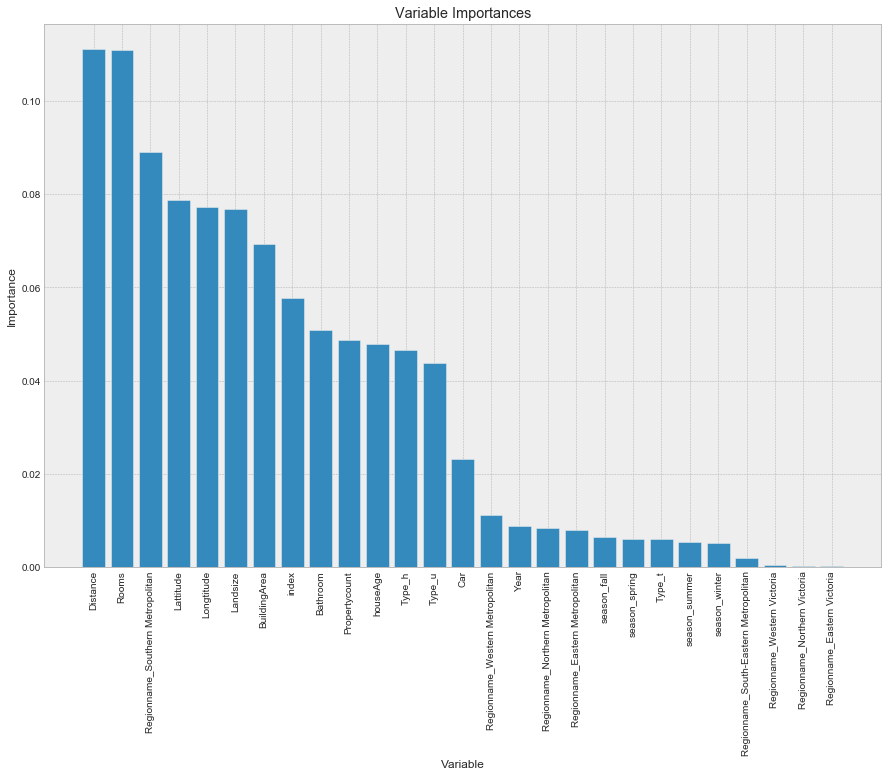

In [72]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### Model Testing

In [73]:
final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 404005.45


In [74]:
# calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
# print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 75.88 %


### K-Modes Clustering Model

In [75]:
# Import K-Modes
from kmodes.kmodes import KModes

# Full drop NA
datafulldrop = housing.dropna()

#### Binning Values

In [76]:
# Create Age Bin
datafulldrop['Period'] = pd.cut(housing['houseAge'], [0, 20, 100, 1000], 
                              labels=['Retro', 'Vintage', 'Antique'])

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Encoding Data Categorical

In [77]:
# categorical data
categorical_data = datafulldrop[['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname', 'Period']]
cluster_data = categorical_data
cluster_data_copy = cluster_data
# show data
cluster_data.head()

# Encoding
le = preprocessing.LabelEncoder()

cluster_data['Period']= categorical_data['Postcode'].astype('object')
cluster_data = cluster_data.apply(le.fit_transform)

# show data
cluster_data.head()

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Suburb,Address,Type,Method,SellerG,Postcode,CouncilArea,Regionname,Period
34585,261,2799,0,2,33,91,31,2,91
20315,11,12835,0,3,146,112,27,5,112
21249,159,12484,0,7,187,92,2,5,92
13618,261,15193,0,2,146,91,31,2,91
32234,81,21554,0,4,94,135,12,4,135


#### Choosing the Best K

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 197131.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 184160.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 176005.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 173, cost: 171505.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1245, cost: 167428.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3095, cost: 163309.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3322, cost: 161306.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...

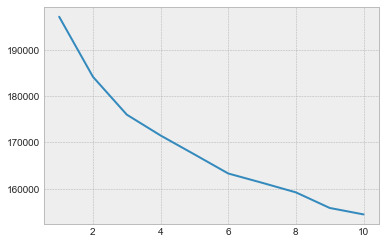

In [78]:
# find best k
cost = []
for num_clusters in list(range(1,11)):
    kmode = KModes(n_clusters=num_clusters, init="Cao", n_init=1, verbose=1)
    kmode.fit_predict(cluster_data)
    cost.append(kmode.cost_)
    
y = np.array([i for i in range(1,11,1)])
plt.plot(y,cost)

#### Model Building

In [79]:
# Choosing K=3
km_cao = KModes(n_clusters=3, init="Cao", n_init=1, verbose=1)
fitClusters_cao2 = km_cao.fit_predict(cluster_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 176005.0


In [80]:
clustersDf = pd.DataFrame(fitClusters_cao2)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([categorical_data, clustersDf], axis=1).reset_index()
combinedDf = combinedDf.drop(['index'], axis=1)
combinedDf.head()

cluster_data_copy['cluster'] = fitClusters_cao2
combineddf2 = cluster_data_copy.reset_index()
combineddf2=combineddf2.drop(['index'], axis=1)
combineddf2.head()

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Suburb,Address,Type,Method,SellerG,Postcode,CouncilArea,Regionname,Period,cluster
0,Richmond,104 Bendigo St,h,S,Biggin,3121,Yarra City Council,Northern Metropolitan,3121,1
1,Armadale,27 Cambridge St,h,SA,Jellis,3143,Stonnington City Council,Southern Metropolitan,3143,0
2,Hawthorn,25 William St,h,VB,Marshall,3122,Boroondara City Council,Southern Metropolitan,3122,0
3,Richmond,30 Corsair St,h,S,Jellis,3121,Yarra City Council,Northern Metropolitan,3121,0
4,Clayton South,55 Murchison Cr,h,SN,Eview,3169,Kingston City Council,South-Eastern Metropolitan,3169,0


In [81]:
cluster_0 = clustersDf[clustersDf['cluster_predicted'] == 0]
cluster_1 = clustersDf[clustersDf['cluster_predicted'] == 1]
cluster_2 = clustersDf[clustersDf['cluster_predicted'] == 2]

#### Visualizing

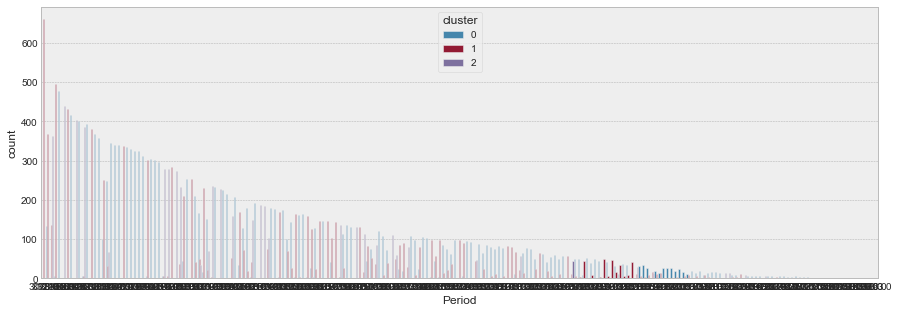

In [82]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combineddf2['Period'],order=combineddf2['Period'].value_counts().index,hue=combineddf2['cluster'])
plt.show()

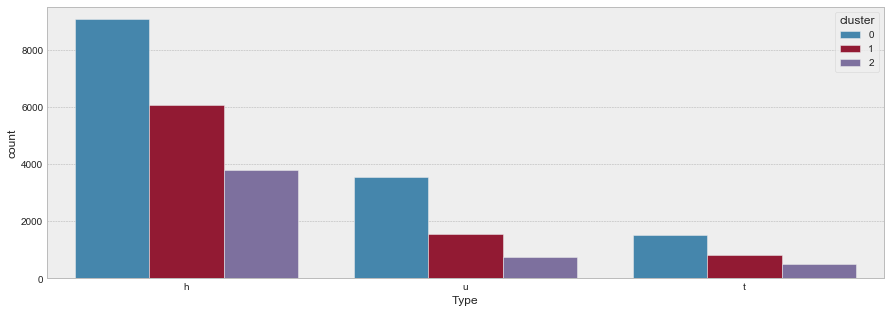

In [83]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combineddf2['Type'],order=combineddf2['Type'].value_counts().index,hue=combineddf2['cluster'])
plt.show()

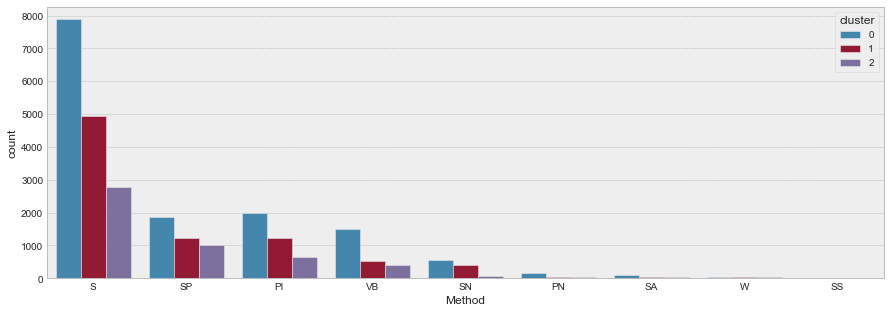

In [84]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combineddf2['Method'],order=combineddf2['Method'].value_counts().index,hue=combineddf2['cluster'])
plt.show()

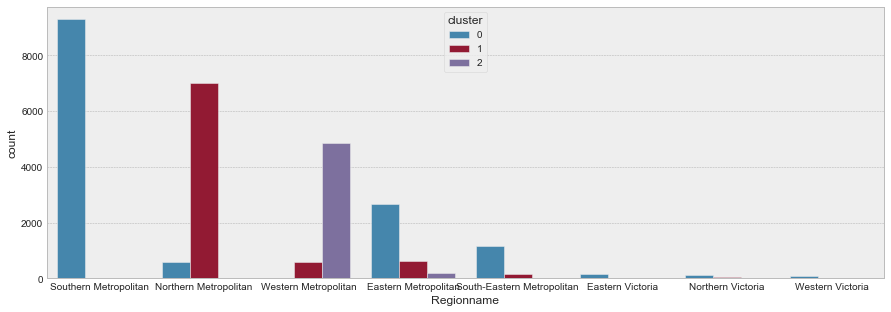

In [85]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combineddf2['Regionname'],order=combineddf2['Regionname'].value_counts().index,hue=combineddf2['cluster'])
plt.show()

In [86]:
combineddf2.groupby('cluster').Method.value_counts()

cluster  Method
0        S         7881
         PI        1982
         SP        1880
         VB        1491
         SN         572
         PN         152
         SA         101
         W           48
         SS          18
1        S         4936
         PI        1224
         SP        1219
         VB         541
         SN         399
         SA          47
         PN          42
         W           40
         SS          10
2        S         2773
         SP         999
         PI         652
         VB         401
         SN          79
         PN          54
         W           40
         SA          29
         SS           2
Name: Method, dtype: int64